In [8]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_excel('D:/Dataset (1).xlsx')
df = df.drop(0)
# type(df)
# df = df.set_index("Дата и время")


In [10]:
df.head()


,Дата и время,Расход газа к. А на интервале 1 час (SAS),"Содержание Nox в уходящих газах, корпус А","Содержание О2 в уходящих газах, слева, корпус А",Расход пара за котлом,"Температура уходящих дымовых газов, Тух",КПД,Суммарная эколого-экономическая нагрузка объекта генерации
1,2021-01-10 00:00:00,35170.011719,84.860184,1.739203,449.866211,321.178116,0.92093,49146.709668
2,2021-01-10 00:01:00,35169.171875,84.938499,1.637651,448.367188,321.212433,0.921626,49190.891481
3,2021-01-10 00:02:00,35168.332031,85.016808,1.715125,448.367188,321.24675,0.921091,49235.066709
4,2021-01-10 00:03:00,35167.496094,85.095123,1.6883,449.060974,321.337814,0.921269,49279.249664
5,2021-01-10 00:04:00,35166.65625,85.173431,1.674236,444.107147,321.46492,0.921356,49323.420566


In [15]:
trn_test = df.drop(["Дата и время", "КПД", "Суммарная эколого-экономическая нагрузка объекта генерации"], axis=1)
trn_test.corr()

""


In [16]:
trg = df["Содержание Nox в уходящих газах, корпус А"]
trn = df.drop(["Дата и время", "КПД", "Суммарная эколого-экономическая нагрузка объекта генерации", "Содержание Nox в уходящих газах, корпус А"], axis=1)
trn.head()

,Расход газа к. А на интервале 1 час (SAS),"Содержание О2 в уходящих газах, слева, корпус А",Расход пара за котлом,"Температура уходящих дымовых газов, Тух"
1,35170.011719,1.739203,449.866211,321.178116
2,35169.171875,1.637651,448.367188,321.212433
3,35168.332031,1.715125,448.367188,321.24675
4,35167.496094,1.6883,449.060974,321.337814
5,35166.65625,1.674236,444.107147,321.46492


In [17]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.6)

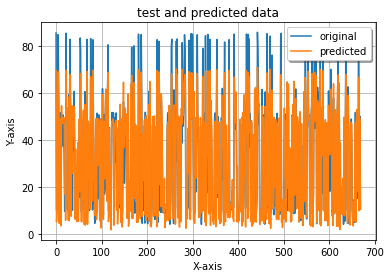

0.9063564473408177


In [19]:
TestModels = DataFrame()
tmp = {}
#обучаем модель
ReadyModel = LinearRegression().fit(Xtrn, Ytrn)
yPredict = ReadyModel.predict(Xtest)
x_ax = range(len(yPredict))
plt.plot(x_ax, Ytest, label="original")
plt.plot(x_ax, yPredict, label="predicted")
plt.title("test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
#вычисляем коэффициент детерминации
tmp['R2_Y1'] = r2_score(Ytest, ReadyModel.predict(Xtest))
print(tmp['R2_Y1'])
#записываем данные и итоговый DataFrame
TestModels = TestModels.append([tmp])

In [20]:
def CalcHarmfulEmissions(gas, o2, steam, t):
    x = {"Расход газа к. А на интервале 1 час (SAS)":pd.Series([gas], index=['1']), "Содержание О2 в уходящих газах, слева, корпус А":pd.Series([o2], index=['1']), "Расход пара за котлом":pd.Series([steam], index=['1']), "Температура уходящих дымовых газов, Тух":pd.Series([t], index=['1'])}
    df = pd.DataFrame(x)
    df.head() 
    # X.append(gas, o2, steam, t)
    nox = ReadyModel.predict(df)
    ecoLoad = 12.372*(((133.1*gas*nox)/0.1)/1000000)
    return nox, ecoLoad
    

In [21]:
nox, ecoLoad = CalcHarmfulEmissions(35168.33203125, 1.71512532234191, 448.3671875, 321.246749877929)
print("Содержание Nox в уходящих газах = ", nox[0])
print("Суммарная эколого-экономическая нагрузка объекта генерации = ", ecoLoad[0])
#pd.array([35168.33203125, 1.71512532234191, 448.3671875, 321.246749877929])

Содержание Nox в уходящих газах =  68.49970717447957
Суммарная эколого-экономическая нагрузка объекта генерации =  39669.657674248
